# EDA

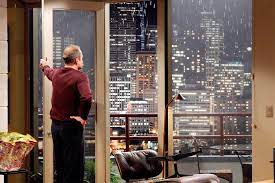

In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
#importing csv file
df = pd.read_csv('data/EDA_project_data.csv')


In [6]:
#check first 5 rows of dataframe
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,6762700020,6.000,8.000,12050.000,27600.000,2.500,0.000,3.000,4,13,...,3480.000,1910,19870.000,98102,47.630,-122.323,3940.000,8800.000,2014-10-13,7700000.000
1,9808700762,5.000,4.500,10040.000,37325.000,2.000,1.000,2.000,3,11,...,2360.000,1940,20010.000,98004,47.650,-122.214,3930.000,25449.000,2014-06-11,7060000.000
2,9208900037,6.000,7.750,9890.000,31374.000,2.000,0.000,4.000,3,13,...,1030.000,2001,0.000,98039,47.630,-122.240,4540.000,42730.000,2014-09-19,6890000.000
3,2470100110,5.000,5.750,9200.000,35069.000,2.000,0.000,0.000,3,13,...,3000.000,2001,NaN,98039,47.629,-122.233,3560.000,24345.000,2014-08-04,5570000.000
4,8907500070,5.000,5.000,8000.000,23985.000,2.000,0.000,4.000,3,12,...,1280.000,2009,0.000,98004,47.623,-122.220,4600.000,21750.000,2015-04-13,5350000.000


In [7]:
#check size of dataframe
df.shape

(21597, 21)

In [8]:
#Check column titles
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [9]:
#check info about datatypes in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

### Data Cleaning

In [152]:
#Dropping columns we won't need for further analysis
df_2 = df.drop(['floors','waterfront','view','yr_built','yr_renovated','lat','long','sqft_above','sqft_basement'], axis=1)

#changing date of sale to datetime format and extract month and year of sales date
df_2['date'] = pd.to_datetime(df_2['date'], format='%Y-%m-%d')
df_2['sale_year'] = df_2['date'].dt.year
df_2['sale_month'] = df_2.date.dt.month

#check for empty values
print(f'There are {df_2.isna().sum().sum()} empty values in the dataframe.')

#converting floats to integer
df_2[['bedrooms','bathrooms','price','sqft_living15','sqft_lot15','sqft_living','sqft_lot']] = df_2[['bedrooms','bathrooms','price','sqft_living15','sqft_lot15','sqft_living','sqft_lot']].astype(int)

#Change type to categorical
df_2['zipcode'] = df_2['zipcode'].astype('category')

#calculating price in $k
df_2['price'] = df_2['price']/1000
df_2['price']= df_2['price'].astype(int)
df_2 = df_2.rename(columns={'price':'price_k'})

#defining new column to get ratio between living area and free space between houses
#to define lively and central neighborhood
#ratio around 1: same area is living space and total space
#ratio below 1: more land than houses
#ratio above 1: more houses than land
df_2['ratio_neighborhood'] = df_2.sqft_living15 / df_2.sqft_lot15

df_2.head()


There are 0 empty values in the dataframe.


,id,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,zipcode,sqft_living15,sqft_lot15,date,price_k,sale_year,sale_month,ratio_neighborhood
0,6762700020,6,8,12050,27600,4,13,98102,3940,8800,2014-10-13,7700,2014,10,0.448
1,9808700762,5,4,10040,37325,3,11,98004,3930,25449,2014-06-11,7060,2014,6,0.154
2,9208900037,6,7,9890,31374,3,13,98039,4540,42730,2014-09-19,6890,2014,9,0.106
3,2470100110,5,5,9200,35069,3,13,98039,3560,24345,2014-08-04,5570,2014,8,0.146
4,8907500070,5,5,8000,23985,3,12,98004,4600,21750,2015-04-13,5350,2015,4,0.211


In [11]:
#check for duplicated rows due to houses sold several times
print(df_2.duplicated(subset='id').value_counts())

False    21420
True       177
dtype: int64


In [12]:
# create dataframe with mean price if house was sold several times
# Note: date of sale is missing after this
df_2_mean_price = df_2.groupby('id').mean().reset_index()
df_2_mean_price.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,price_k,sale_year,sale_month,ratio_neighborhood
0,1000102,6.000,3.000,2400.000,9373.000,2060.000,7316.000,290.000,2014.500,6.500,0.282
1,1200019,4.000,1.000,2060.000,26036.000,2590.000,21891.000,647.000,2014.000,5.000,0.118
2,1200021,3.000,1.000,1460.000,43000.000,2250.000,20023.000,400.000,2014.000,8.000,0.112
3,2800031,3.000,1.000,1430.000,7599.000,1290.000,10320.000,235.000,2015.000,4.000,0.125
4,3600057,4.000,2.000,1650.000,3504.000,1480.000,3504.000,402.000,2015.000,3.000,0.422


In [13]:
#general analysis of price
df_2.price_k.describe()

count   21597.000
mean      540.164
std       367.404
min        78.000
25%       322.000
50%       450.000
75%       645.000
max      7700.000
Name: price_k, dtype: float64

In [14]:
#general analysis of other parameters of house details
df_2_mean_price.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,price_k,sale_year,sale_month,ratio_neighborhood
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,4580939869.158,3.374,1.753,2083.133,15128.038,1988.384,12775.718,541.167,2014.322,6.577,0.308
std,2876761172.448,0.925,0.734,918.808,41530.797,685.537,27345.622,367.701,0.466,3.103,0.227
min,1000102.000,1.000,0.000,370.000,520.000,399.000,651.000,78.000,2014.000,1.000,0.001
25%,2123537386.750,3.000,1.000,1430.000,5040.000,1490.000,5100.000,324.000,2014.000,4.000,0.174
50%,3904921185.000,3.000,2.000,1920.000,7614.000,1840.000,7620.000,450.000,2014.000,6.000,0.247
75%,7308900186.250,4.000,2.000,2550.000,10690.500,2370.000,10086.250,645.000,2015.000,9.000,0.377
max,9900000190.000,33.000,8.000,13540.000,1651359.000,6210.000,871200.000,7700.000,2015.000,12.000,2.242


### Hypothesis 1: 
Houses with a larger size are more expensive compared to smaller houses


In [193]:
#describe price distribution for all houses
print(f'{df_2.price_k.count()} houses were sold in Seattle in the years 2014 and 2015.')
print(f'Houses were sold for a mean price of {df_2.price_k.mean().round(2)} k$.')
print(f'The lowest price was {df_2.price_k.min().round(2)} k$.')
print(f'The highest price was {df_2.price_k.max().round(2)} k$.')
print(f'The middle range price was between {((df_2.price_k.mean()) - (df_2.price_k.std())).round()} and {((df_2.price_k.mean()) + (df_2.price_k.std())).round()} k$.')

21597 houses were sold in Seattle in the years 2014 and 2015.
Houses were sold for a mean price of 540.16 k$.
The lowest price was 78 k$.
The highest price was 7700 k$.
The middle range price was between 173.0 and 908.0 k$.


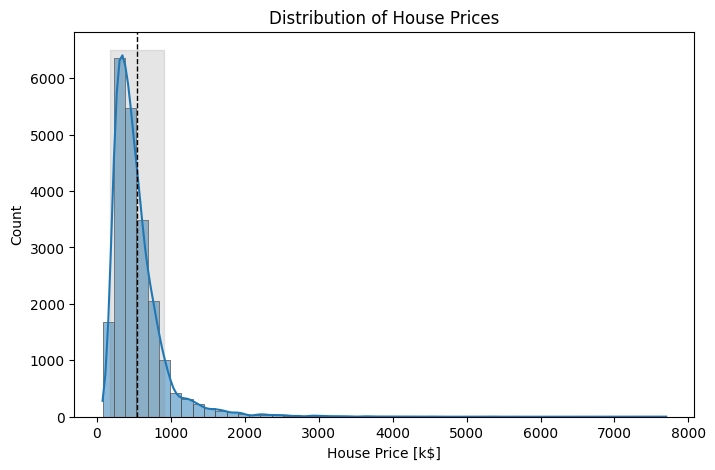

In [64]:
# generate histogram for price
fig = sns.histplot(
    df_2,
    x="price_k",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, bins=50, kde=True)
plt.xlabel("House Price [k$]")
plt.ylabel("Count")
plt.title("Distribution of House Prices") 
plt.fill_between(((df_2.price_k.mean()) + (df_2.price_k.std()), (df_2.price_k.mean()) - (df_2.price_k.std())), y1=6500, color='grey', alpha=0.2)
plt.axvline(x=df_2.price_k.mean(),
            color='black',
            ls='--', 
            lw=1)
fig;

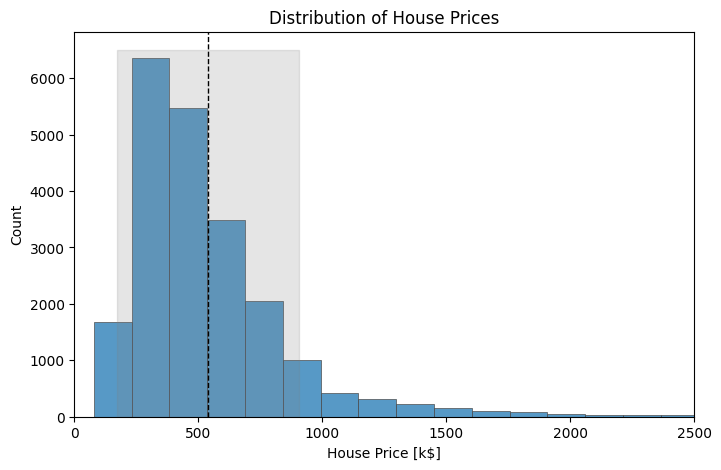

In [63]:
# generate histogram for price at higher resolution x axis
fig = sns.histplot(
    df_2,
    x="price_k",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, bins=50)


plt.xlabel("House Price [k$]")
plt.ylabel("Count")
plt.title("Distribution of House Prices") 
plt.xlim(xmin=0, xmax = 2500)
plt.fill_between(((df_2.price_k.mean()) + (df_2.price_k.std()), (df_2.price_k.mean()) - (df_2.price_k.std())), y1=6500, color='grey', alpha=0.2)
plt.axvline(x=df_2.price_k.mean(),
            color='black',
            ls='--', 
            lw=1)
fig;

In [194]:
#filtering for houses in desired size
df_3 = df_2.query('sqft_living > 700 and sqft_living < 2000')
df_3.id.count()
print(f'{df_3.id.count()} houses in the desired size between 700 and 2000 sqft were sold.')


#determination of mean price in desired house size
print(f'Houses with a size between 70 and 2000 sqft were sold for a mean price of {df_3.price_k.mean().round(2)} k$.')
print(f'The lowest price was {df_3.price_k.min().round(2)} k$.')
print(f'The highest price was {df_3.price_k.max().round(2)} k$.')
print(f'The middle range price was between {((df_3.price_k.mean()) - (df_3.price_k.std())).round()} and {((df_3.price_k.mean()) + (df_3.price_k.std())).round(1)} k$.')



11429 houses in the desired size between 700 and 2000 sqft were sold.
Houses with a size between 70 and 2000 sqft were sold for a mean price of 387.19 k$.
The lowest price was 78 k$.
The highest price was 1500 k$.
The middle range price was between 232.0 and 542.6 k$.


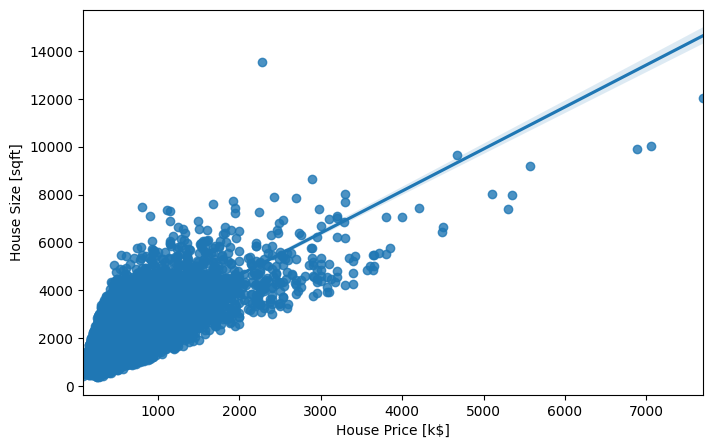

In [210]:
#Line plot to show correlation between price and house size with regression line
#fig = sns.lineplot(data=df_2, x='price_k',y='sqft_living')
fig = sns.regplot(data=df_2, x='price_k',y='sqft_living')
plt.xlabel("House Price [k$]")
plt.ylabel("House Size [sqft]")
fig;

In [19]:
#comparing mean price of bigger houses with desired size houses
price_diff = df_3.price_k.mean() / df_2.query('sqft_living > 2000').price_k.mean() * 100
print(f'Houses with desired size below 2000 sqft are {(100 - price_diff).round(2)} % cheaper than bigger houses.')

#ToDo: calculate significance

Houses with desired size below 2000 sqft are 46.41 % cheaper than bigger houses.


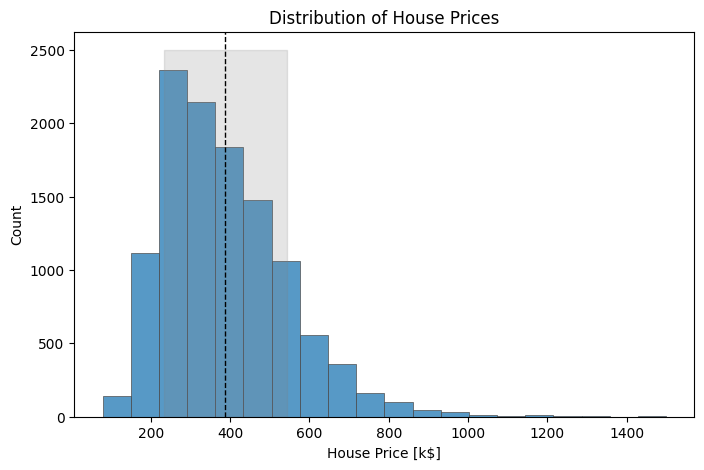

In [76]:
# histogram for prices in desired house size
fig = sns.histplot(
    df_3,
    x="price_k",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, bins=20)
plt.xlabel("House Price [k$]")
plt.ylabel("Count")
plt.title("Distribution of House Prices") 
plt.fill_between(((df_3.price_k.mean()) + (df_3.price_k.std()), (df_3.price_k.mean()) - (df_3.price_k.std())), y1=2500, color='grey', alpha=0.2)
plt.axvline(x=df_3.price_k.mean(),
            color='black',
            ls='--', 
            lw=1)
fig;

             price_k  sqft_living  sqft_lot  bedrooms  bathrooms
price_k        1.000        0.702     0.090     0.309      0.511
sqft_living    0.702        1.000     0.173     0.578      0.699
sqft_lot       0.090        0.173     1.000     0.032      0.086
bedrooms       0.309        0.578     0.032     1.000      0.466
bathrooms      0.511        0.699     0.086     0.466      1.000


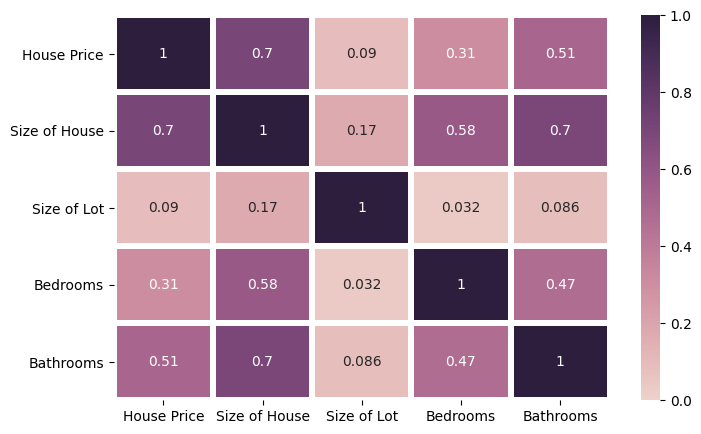

In [85]:
#calculate correlation between house size and price
#scatter plots to find correlation between size and room numbers with price
#creating correlation matrix for correlation between house size and price
corr_mtrx = df_2[['price_k','sqft_living','sqft_lot', 'bedrooms', 'bathrooms']].corr()
print(corr_mtrx)

#creating heatmap for correlation
fig =sns.heatmap(corr_mtrx, linewidths=4, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), vmin = 0, xticklabels=['House Price', 'Size of House', 'Size of Lot', 'Bedrooms', 'Bathrooms'], yticklabels=['House Price', 'Size of House', 'Size of Lot', 'Bedrooms', 'Bathrooms']);
fig;



### Hypothesis 2:
Houses located in central zip codes are more expensive.

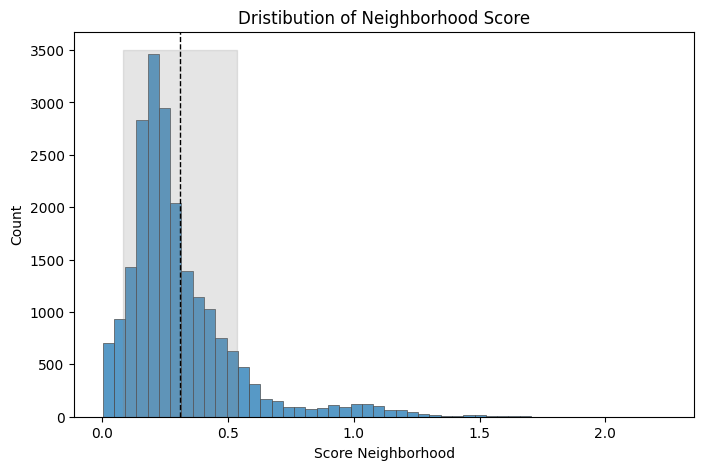

In [75]:
#distribution of neighborhood ratio for all houses
fig = sns.histplot(
    df_2,
    x="ratio_neighborhood",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, bins=50)
plt.xlabel("Score Neighborhood")
plt.ylabel("Count")
plt.title("Dristibution of Neighborhood Score") 
plt.fill_between(((df_2.ratio_neighborhood.mean()) + (df_2.ratio_neighborhood.std()), (df_2.ratio_neighborhood.mean()) - (df_2.ratio_neighborhood.std())), y1=3500, color='grey', alpha=0.2)
plt.axvline(x=df_2.ratio_neighborhood.mean(),
            color='black',
            ls='--', 
            lw=1)
fig;

25 zip code areas are considered as zip codes with a central and lively neighborhood.


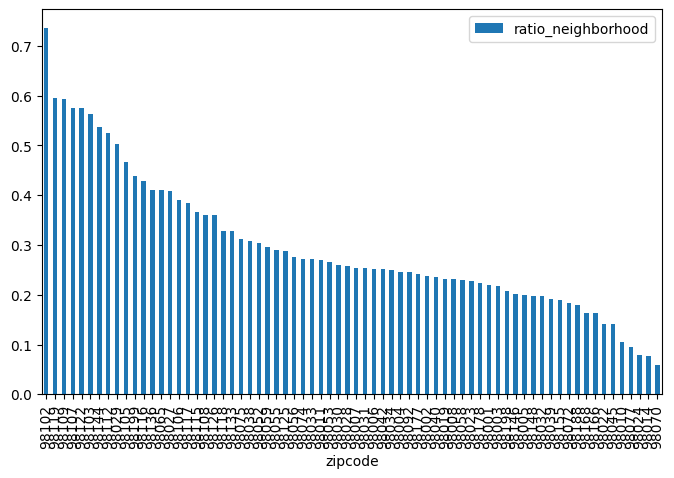

In [25]:
#plot to define ratio between zipcode and ratio_neighborhood
df_2[['ratio_neighborhood','zipcode']].groupby('zipcode').mean().sort_values(by='ratio_neighborhood',ascending=False).plot(kind='bar')

#mean value of neighborhood ratio for all zip codes
#zip codes above mean value are defined as central neighborhoods
df_2[['ratio_neighborhood','zipcode']].groupby('zipcode').mean().mean()

#create list with zipcodes considered as central
zip_central = df_2.groupby('zipcode').mean().query('ratio_neighborhood > 0.3').reset_index().zipcode.tolist()
print(f'{len(zip_central)} zip code areas are considered as zip codes with a central and lively neighborhood.')


In [211]:
zip_central

[98027,
 98029,
 98038,
 98052,
 98065,
 98075,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98126,
 98133,
 98136,
 98144,
 98199]

5065 are located in zip codes considered as central and lively neighborhoods.
Houses with a size between 70 and 2000 sqft and in desired zip codes were sold for a mean price of 454.71 k$.
The lowest price was 90 k$.
The highest price was 1330 k$.
The middle range price was between 346.0 and 545.0 k$.
Prices for houses with desired size and desired zip code are 36.37 % higher compared with houses in other zip codes.
Prices for all houses with desired zip code are 16.1 % higher compared with houses in other zip codes.
The price range for both desired filters is between 305.0 and 604.0 k$.


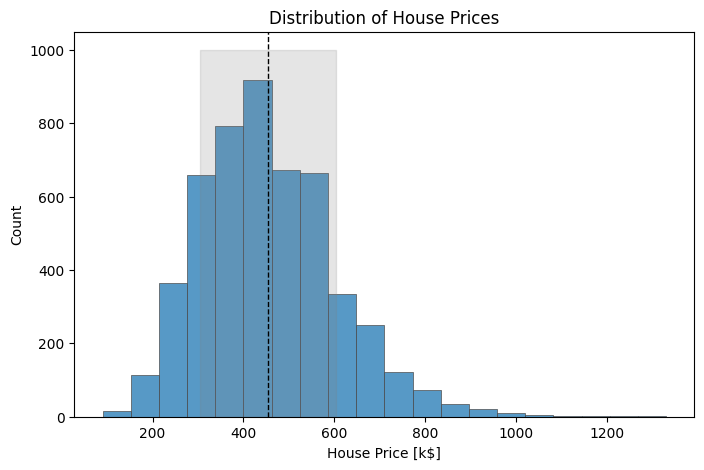

In [192]:
# define price range for houses with desired size and zip code
df_4 = df_3.query(f'zipcode == {zip_central}')

print(f'{df_4.id.count()} are located in zip codes considered as central and lively neighborhoods.')
#determination of mean price in desired house size and zip code
print(f'Houses with a size between 70 and 2000 sqft and in desired zip codes were sold for a mean price of {df_4.price_k.mean().round(2)} k$.')
print(f'The lowest price was {df_4.price_k.min().round(2)} k$.')
print(f'The highest price was {df_4.price_k.max().round(2)} k$.')
print(f'The middle range price was between {df_4.price_k.quantile(0.25).round(1)} and {df_4.price_k.quantile(0.75).round(1)} k$.')

#comparing mean price of houses with desired size and zip code with houses price in other zip codes
price_diff2 = df_4.price_k.mean() / df_3.query(f'zipcode != {zip_central}').price_k.mean() * 100
print(f'Prices for houses with desired size and desired zip code are {(price_diff2-100).round(2)} % higher compared with houses in other zip codes.')

#comparing mean prices of houses of all sizes in desired zip codes with houses in other zip codes
# mean price of all houses in zipcodes / mean price of all houses outside of zipcodes
price_diff3 = df_2.query(f'zipcode == {zip_central}').price_k.mean() /df_2.query(f'zipcode != {zip_central}').price_k.mean() *100
print(f'Prices for all houses with desired zip code are {(price_diff3-100).round(2)} % higher compared with houses in other zip codes.')

print(f'The price range for both desired filters is between {((df_4.price_k.mean())-(df_4.price_k.std())).round()} and {((df_4.price_k.mean())+(df_4.price_k.std())).round()} k$.')

#histogram for price distribution for desired houses
#fig = plt.hist(df_4.price_k, bins=100)

fig = sns.histplot(
    df_4,
    x="price_k",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, bins=20)
plt.xlabel("House Price [k$]")
plt.ylabel("Count")
plt.title("Distribution of House Prices") 
plt.fill_between(((df_4.price_k.mean()) + (df_4.price_k.std()), (df_4.price_k.mean()) - (df_4.price_k.std())), y1=1000, color='grey', alpha=0.2)
plt.axvline(x=df_4.price_k.mean(),
            color='black',
            ls='--', 
            lw=1)
fig;


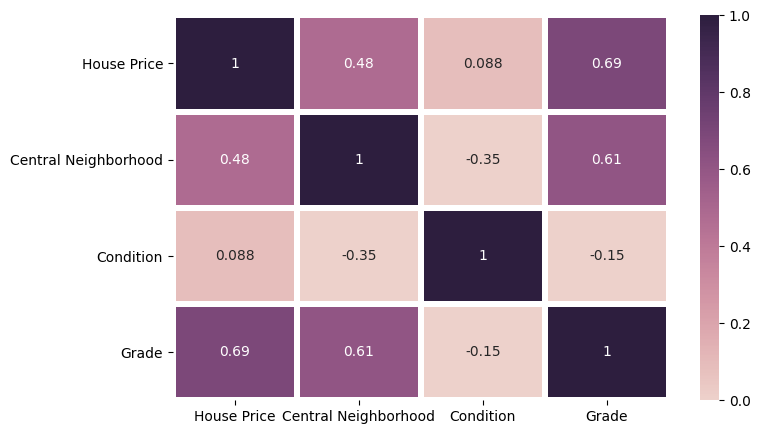

In [95]:
#Plot correlation between neighborhood ratio of zip code and price for houses in desired size
corr_mtrx3 = df_3[['price_k','ratio_neighborhood', 'condition', 'grade', 'zipcode']].groupby('zipcode').mean().corr();
#creating heatmap for correlation
fig=sns.heatmap(corr_mtrx3, linewidths=4, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), vmin = 0, xticklabels=['House Price', 'Central Neighborhood', 'Condition', 'Grade'], yticklabels=['House Price', 'Central Neighborhood', 'Condition', 'Grade']);
fig;

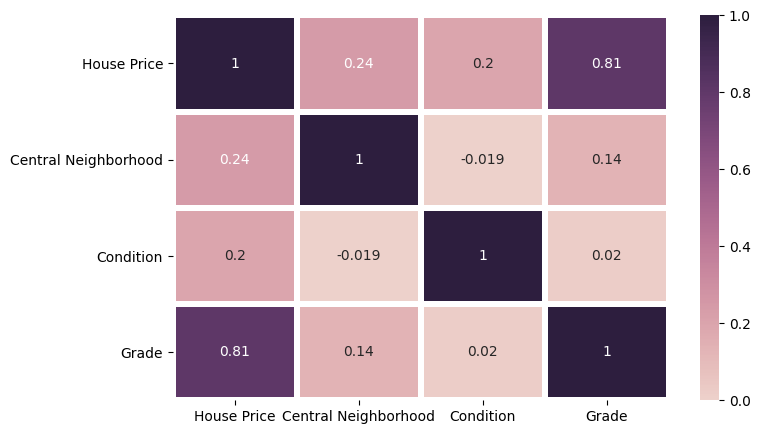

In [96]:
#Plot correlation between neighborhood ratio of zip code and price for all sizes
corr_mtrx4 = df_2[['price_k','ratio_neighborhood', 'condition', 'grade', 'zipcode']].groupby('zipcode').mean().corr();
#creating heatmap for correlation
fig=sns.heatmap(corr_mtrx4, linewidths=4, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), vmin = 0, xticklabels=['House Price', 'Central Neighborhood', 'Condition', 'Grade'], yticklabels=['House Price', 'Central Neighborhood', 'Condition', 'Grade']);
fig;

### Hypothesis 3:
* buying a house during fall is cheaper than in spring
* extract year and month information from sales date

In [29]:
#generate list of month names
import calendar
m = calendar.month_name[1:]
print(m)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


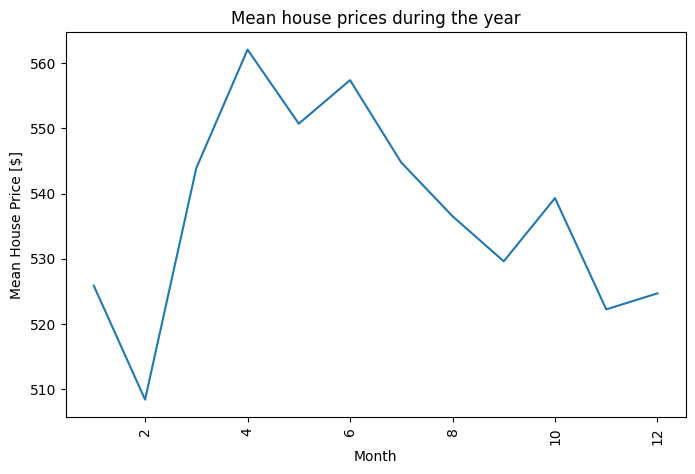

In [153]:
df_month = df_2.groupby('sale_month').mean('price_k')
fig = sns.lineplot(df_month.index,df_month.price_k)
plt.title('Mean house prices during the year')
plt.xlabel('Month')
plt.ylabel('Mean House Price [$]')
plt.tick_params(axis='x', rotation=90)
plt.show()

#ToDo: Calculate increase of mean house price after february

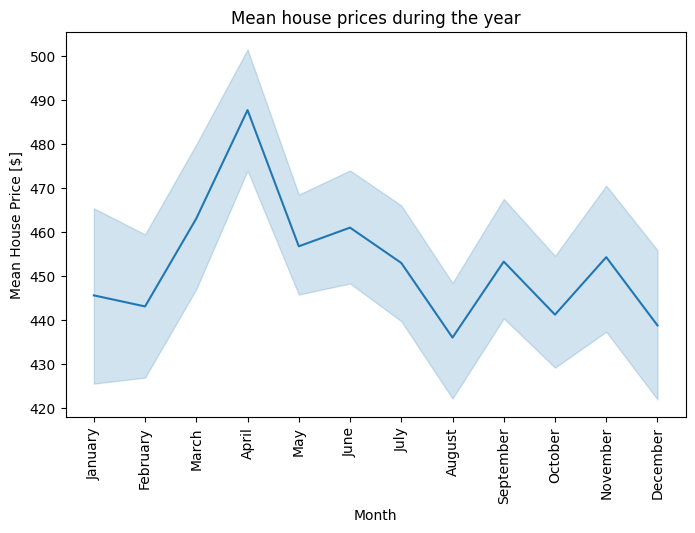

In [178]:
#check price distribution throughout the year for final filtered houses
fig = sns.lineplot(x="sale_month", y="price_k",
             data=df_4, palette='crest')
plt.title('Mean house prices during the year')
plt.xlabel('Month')
plt.ylabel('Mean House Price [$]')
fig.set_xticks(range(1,13), labels=m)
fig.tick_params(axis='x', rotation=90)
plt.show()


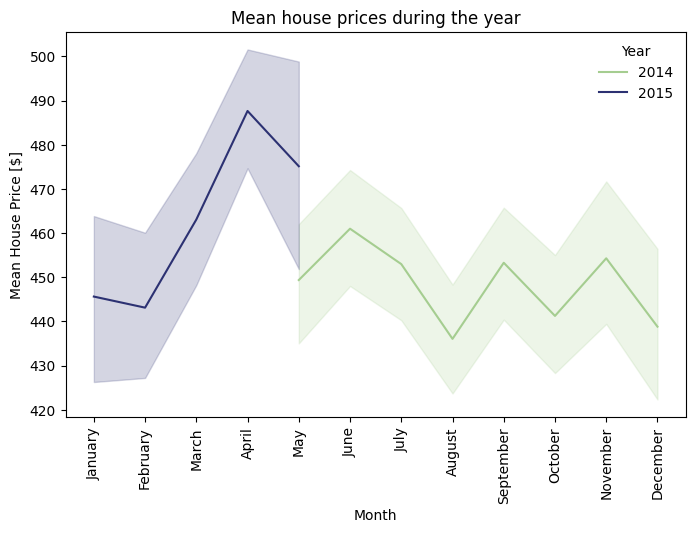

In [179]:
#check price distribution throughout the year for final filtered houses
fig = sns.lineplot(x="sale_month", y="price_k",
             hue="sale_year",
             data=df_4, palette='crest')
plt.title('Mean house prices during the year')
plt.xlabel('Month')
plt.ylabel('Mean House Price [$]')
fig.set_xticks(range(1,13), labels=m)
fig.tick_params(axis='x', rotation=90)
plt.legend(title='Year', frameon=False)
plt.show()


In [182]:
df_4[['sale_month','price_k']].groupby('sale_month').mean()

,price_k
sale_month,
1,445.618
2,443.108
3,463.064
4,487.659
5,456.750
6,460.990
7,452.975
8,436.038
9,453.278


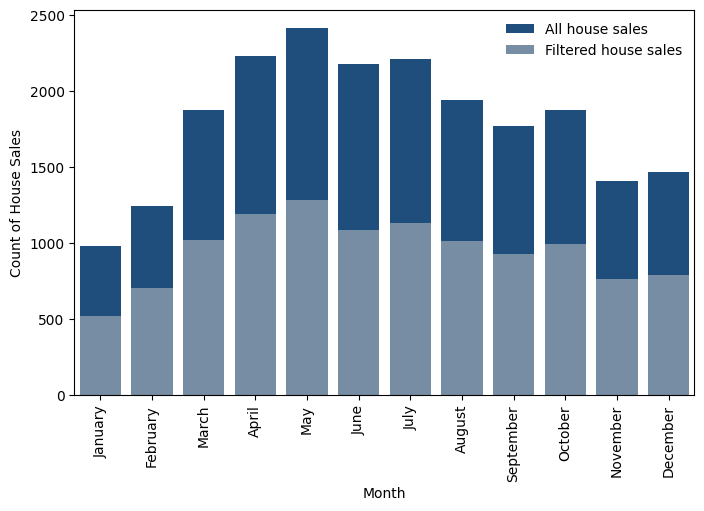

In [161]:
#check number of available houses available for different month during the year
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.countplot(x=df_2["sale_month"], color='#104E8B')
ax = sns.countplot(x=df_3["sale_month"], color='#6E8DAB')

 
# renaming the axes
ax.set_xticklabels(labels=m)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Month", ylabel="Count of House Sales")
plt.legend(labels=['All house sales', 'Filtered house sales'], frameon=False)
 
# visualizing illustration
plt.show()